In [ ]:
!wget https://huggingface.co/datasets/OpenRL/DeepFakeFace/resolve/main/inpainting.zip
!wget https://huggingface.co/datasets/OpenRL/DeepFakeFace/resolve/main/wiki.zip

--2024-04-30 11:41:46--  https://huggingface.co/datasets/OpenRL/DeepFakeFace/resolve/main/inpainting.zip
Resolving huggingface.co (huggingface.co)... 3.163.189.74, 3.163.189.90, 3.163.189.37, ...
Connecting to huggingface.co (huggingface.co)|3.163.189.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/43/54/4354080778713efff252f32d0ea8cda241f8af84fe016fdd4e0d57db34b94861/795b751f0967b2d940fbd9825e05c541666ec6f8c634acc7640044542897b7b2?response-content-disposition=attachment%3B+filename*%3DUTF-8%27%27inpainting.zip%3B+filename%3D%22inpainting.zip%22%3B&response-content-type=application%2Fzip&Expires=1714736506&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcxNDczNjUwNn19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy80My81NC80MzU0MDgwNzc4NzEzZWZmZjI1MmYzMmQwZWE4Y2RhMjQxZjhhZjg0ZmUwMTZmZGQ0ZTBkNTdkYjM0Yjk0ODYxLzc5NWI3NTFmMDk2N2IyZDk0MGZiZDk4MjVlMDVjNTQxNjY2ZWM2

In [ ]:
!unzip -q inpainting.zip
!unzip -q wiki.zip


!rm -r inpainting.zip
!rm -r wiki.zip

In [ ]:
import os
import shutil

def copy_images(source_folder, destination_folder):
    # Create the destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Walk through each subfolder in the source folder
    for root, dirs, files in os.walk(source_folder):
        for file in files:
            # Check if the file is an image
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.gif')):
                # Get the full path of the image
                source_path = os.path.join(root, file)
                # Copy the image to the destination folder
                shutil.copy(source_path, destination_folder)

In [ ]:
!rm -r real
!rm -r fake
!rm -r real_vs_fake

rm: cannot remove 'real': No such file or directory
rm: cannot remove 'fake': No such file or directory
rm: cannot remove 'real_vs_fake': No such file or directory


In [ ]:
# Specify the source folder containing subfolders with images
destination_folder = 'real'
# Specify the destination folder where images will be copied
source_folder = 'wiki'

# Call the function to copy images
copy_images(source_folder, destination_folder)

In [ ]:
# Specify the source folder containing subfolders with images
destination_folder = 'fake'
# Specify the destination folder where images will be copied
source_folder = 'inpainting'

# Call the function to copy images
copy_images(source_folder, destination_folder)

In [ ]:
!mkdir real_vs_fake

In [ ]:
import os
import shutil
import random

# Define paths
source_folder = "real"
destination_folder = "real_vs_fake"

# Create destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Create test, train, and valid folders within destination folder
folders = ['test', 'train', 'valid']
for folder in folders:
    os.makedirs(os.path.join(destination_folder, folder, 'real'), exist_ok=True)

# List all images in source folder
images = os.listdir(source_folder)
random.shuffle(images)

# Calculate the number of images for each category
total_images = len(images)
test_count = 5000
train_count = int(0.8 * (total_images - test_count))
valid_count = total_images - test_count - train_count

# Move images to respective folders
for folder, count in [('test', test_count), ('train', train_count), ('valid', valid_count)]:
    for i in range(count):
        image = images.pop()
        shutil.copy(os.path.join(source_folder, image), os.path.join(destination_folder, folder, 'real'))

# Copy train, valid, and test folders to real_vs_fake
# for folder in folders:
#     shutil.copytree(os.path.join(destination_folder, folder), os.path.join(destination_folder, 'real_vs_fake', folder))


In [ ]:
import os
import shutil
import random

In [ ]:
# Define paths
source_folder = "fake"
destination_folder = "real_vs_fake"

# Create destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Create test, train, and valid folders within destination folder
folders = ['test', 'train', 'valid']
for folder in folders:
    os.makedirs(os.path.join(destination_folder, folder, 'fake'), exist_ok=True)

# List all images in source folder
images = os.listdir(source_folder)
random.shuffle(images)

# Calculate the number of images for each category
total_images = len(images)
test_count = 5000
train_count = int(0.8 * (total_images - test_count))
valid_count = total_images - test_count - train_count

# Move images to respective folders
for folder, count in [('test', test_count), ('train', train_count), ('valid', valid_count)]:
    for i in range(count):
        image = images.pop()
        shutil.copy(os.path.join(source_folder, image), os.path.join(destination_folder, folder, 'fake'))

# Copy train, valid, and test folders to real_vs_fake
# for folder in folders:
#     shutil.copytree(os.path.join(destination_folder, folder), os.path.join(destination_folder, 'real_vs_fake', folder))


In [ ]:
# !rm -r /kaggle/working/real_vs_fake
# !rm -r /kaggle/working/fake
# !rm -r /kaggle/working/real

In [ ]:
def count_files(folder_path):
    # Initialize count
    file_count = 0

    # Walk through the folder and count files
    for _, _, files in os.walk(folder_path):
        file_count += len(files)

    return file_count

In [ ]:
# Specify the folder path
folders = ['test', 'train', 'valid']
folder_path = 'real_vs_fake/'

for i in folders:
  print("Number of files in fake/"+str(i)+" :", count_files(folder_path+i+'/fake'))

Number of files in fake/test : 5000
Number of files in fake/train : 20000
Number of files in fake/valid : 5000


In [ ]:
%matplotlib

Using matplotlib backend: nbAgg


In [ ]:
import os
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename)).convert('RGB')
        if img is not None:
            img = img.resize((224, 224))  # Resize to make them uniform
            img_array = np.array(img)
            img_array = img_array.flatten()  # Flatten the 2D image to 1D array
            images.append(img_array)
    return images

def apply_pca(images):
    pca = PCA(n_components=3)
    transformed_data = pca.fit_transform(images)
    return transformed_data

def plot_3d(data_real, data_fake):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.scatter(data_real[:, 0], data_real[:, 1], data_real[:, 2], c='blue', label='Real')
    ax.scatter(data_fake[:, 0], data_fake[:, 1], data_fake[:, 2], c='red', label='Fake')

    ax.set_xlabel('Component 1')
    ax.set_ylabel('Component 2')
    ax.set_zlabel('Component 3')
    ax.legend()

    plt.show()

# Load images
path_real = 'real_vs_fake/test/real'
path_fake = 'real_vs_fake/test/fake'

real_images = load_images_from_folder(path_real)
fake_images = load_images_from_folder(path_fake)

# Apply PCA
real_data = apply_pca(real_images)
fake_data = apply_pca(fake_images)

# Plot
plot_3d(real_data, fake_data)


/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 2 bytes but only got 0. 
  warnings.warn(str(msg))


<IPython.core.display.Javascript object>

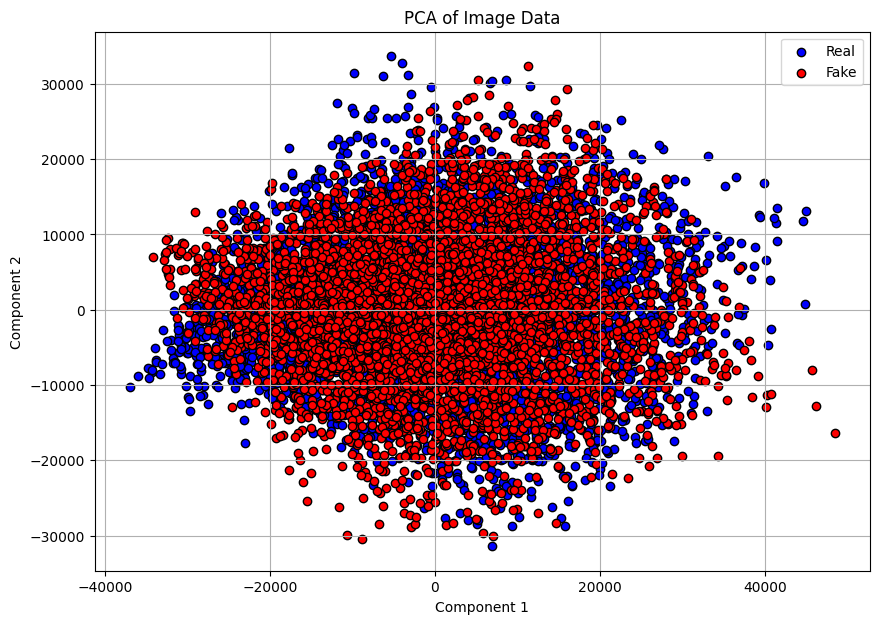

In [ ]:
import matplotlib.pyplot as plt

def plot_2d(data_real, data_fake):
    plt.figure(figsize=(10, 7))
    plt.scatter(data_real[:, 0], data_real[:, 1], c='blue', label='Real', edgecolor='k')
    plt.scatter(data_fake[:, 0], data_fake[:, 1], c='red', label='Fake', edgecolor='k')
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.title('PCA of Image Data')
    plt.legend()
    plt.grid(True)
    plt.show()

# Use this function instead of plot_3d in your main code
plot_2d(real_data, fake_data)